# 분류: K-Fold 교차 검증
## 1. 개요
### 1) 머신러닝을 구현하는 과정에서의 대표적 문제점
1. 과대적합(Overfitting): 학습 데이터를 과하게 학습하는 것
2. 과소적합(Underfitting): 학습 데이터를 충분히 학습하지 못하는 것
3. Sample loss 문제: 학습 데이터가 적은 경우 발생하는 문제
    - 데이터를 Train용과 Test용으로 나누는 과정에서 Train데이터가 부족해지기 때문에 발생하는 문제

- 위와 같은 상황에서 학습이 발생시키는 에러를 과소추정하지 않으면서 데이터의 손실을 최소화하는 방법으로 `K-Fold 교차 검증`이 있다

### 2) k-fold 교차 검증 예시
- `k`가 5인 경우에 대한 예시

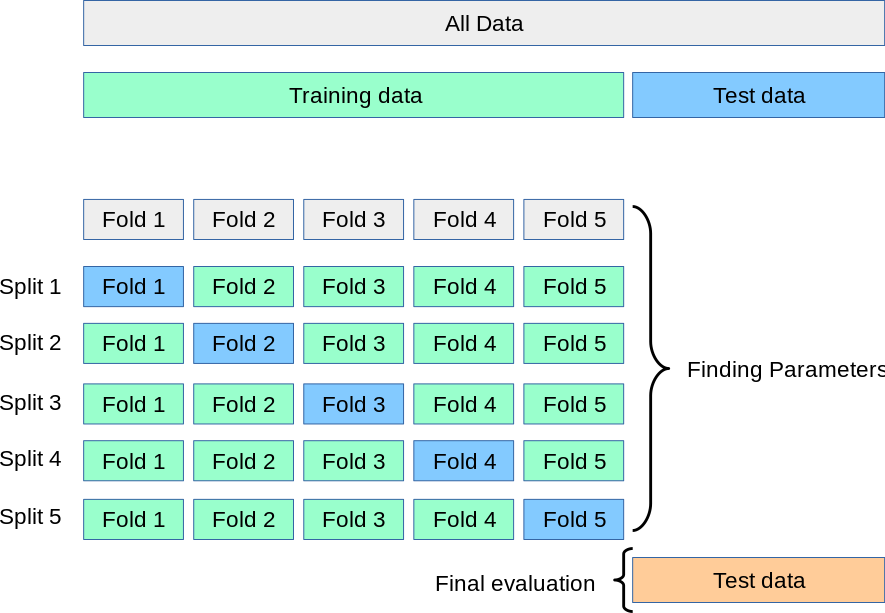

In [1]:
from IPython.display import display, Image
display(Image('image12_kfold.png'))

- fold가 5로 이루어져 있다
- 하나의 데이터셋을 5등분하여 각 fold마다 한 번씩 test데이터가 되도록 train_split을 개별 수행한다
- 그 결과 총 5번의 학습이 가능해지며 그 학습 결과에 대한 평균치(혹은 최대치)를 구한다

## 2. 패키지 참조

In [4]:
import warnings
warnings.filterwarnings('ignore')

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 교차 검증 패키지
from sklearn.model_selection import cross_val_score

> 원래 `cross_val_score` 함수는 `sklearn.cross_validation`이라는 클래스에 포함되어 있었다.
> sklearn이 버전업을 하면서 함수의 패키지가 이전되었다. 이 경우 sklearn패키지 업그레이드가 권장된다

## 3. 데이터 전처리
### 1) 데이터셋 준비

In [5]:
origin = read_excel('https://data.hossam.kr/G02/iris.xlsx')
origin

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 2) 라벨링

In [6]:
labels = {'setosa': 0, 'versicolor':1, 'virginica':2}
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

In [7]:
df1 = origin.copy()
df1['Species'] = df1['Species'].map(labels)
df1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 3) 독립변수, 종속변수 분리

In [8]:
x = df1.drop('Species', axis=1)
y = df1.filter(['Species'])
x.shape, y.shape

((150, 4), (150, 1))

## 4. K-Fold 교차검증을 수행하는 모델링
### 1) K-Fold만 적용한 경우

In [15]:
k=5
knn = KNeighborsClassifier(n_neighbors=k)

# 기존 코드
# knn.fit(x, y)                       # 학습
# y_pred = knn.predict(x)             # 예측값
# score = accuracy_score(y, y_pred)   # 정확도

# 교차 검증
score = cross_val_score(knn, x, y, cv=10, scoring='accuracy')

# 교차 검증 결과 -> 10개의 fold를 나누어서 10번 학습/평가를 수행
print(score)

# 10개의 정확도 평균
print(score.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668


### 2) 최적의 k값 찾기

In [16]:
k_range = range(1, 101)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn,
                            x,
                            y,
                            cv=10,
                            scoring='accuracy')
    k_scores.append(score.mean())

k_scores

[0.96,
 0.9533333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9800000000000001,
 0.9666666666666666,
 0.9666666666666666,
 0.9733333333333334,
 0.96,
 0.9666666666666666,
 0.96,
 0.9666666666666666,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9466666666666667,
 0.9400000000000001,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9400000000000001,
 0.9266666666

- 가장 높은 정확도를 갖는 k값 찾기

In [19]:
# 일반 코딩 (최댓값 찾기 알고리즘)
max_acc = k_scores[0]
max_index = 0
for i in range(1, len(k_scores)):
    if max_acc < k_scores[i]:
        max_acc = k_scores[i]
        max_index = i
print('<일반 코딩 결과>')
print('최대 정확도: {0}, 최대 정확도를 갖는 k: {1}'.format(max_acc, max_index+1))

# 파이썬 내장함수 활용
max_acc = max(k_scores)
max_index = k_scores.index(max_acc)
print('<파이썬 내장 함수 활용>')
print('최대 정확도: {0}, 최대 정확도를 갖는 k: {1}'.format(max_acc, max_index+1))


<일반 코딩 결과>
최대 정확도: 0.9800000000000001, 최대 정확도를 갖는 k: 13
<파이썬 내장 함수 활용>
최대 정확도: 0.9800000000000001, 최대 정확도를 갖는 k: 13


### 3) 학습 과정 시각화

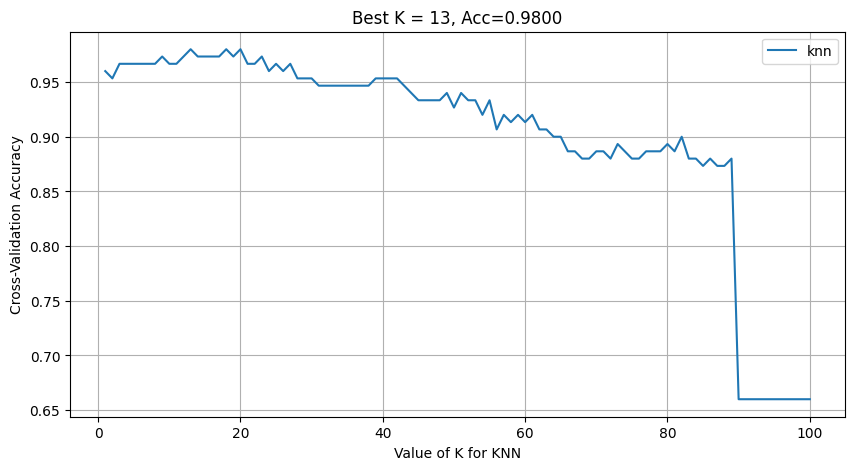

In [20]:
plt.figure(figsize = (10, 5))
sb.lineplot(x = k_range,
            y = k_scores,
            label='knn')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Best K = {0}, Acc={1:.4f}'.format(max_index+1, max_acc))
plt.grid()
plt.show()
plt.close()